# Caracterização de eletrofáceis por meio de inteligência artificial com abordagem supervisionada
## Verificação dos dados da fusão

- **Nome do Arquivo**: verificacao_fusao.ipynb
- **Autor**: Rafael Takeguma Goto
- **Versão**: 1.0
- **Data de Criação**: 01/07/2024
- **Data de Modificação**: 01/07/2024

### Descrição: 
Este notebook contém uma etapa adicional do trabalho referente à verificação dos dados fusão, a fim de certificar que o encaixe dos dados da fusão está correta.

### Leitura dos dados da extração dlis

Leitura dos dados dos arquivos da extração dlis, que estão localizados na pasta Dados-dlis-pre-processados.

In [1]:
import glob
import pandas as pd

leituras_extracao_dlis = []      # Armazena as leituras dos arquivos .csv da extração dlis
nomes_extracao_dlis = []          # Armazena os nomes obtidos das leituras dos arquivos da extração dlis

for file in glob.glob(r'**/Dados-dlis-pre-processados' + "/*.csv", recursive=True):
    try:
        # Salva os dados da leitura
        leitura = pd.read_csv(f'{file}')
        leituras_extracao_dlis.append(leitura)

        # Salva o nome do poço
        nomes_extracao_dlis.append(file)
    except:
        print(file)

In [2]:
# Casa itens da lista 'nomes_extacao_dlis' com os itens da lista 'leituras_extracao_dlis'
pares = zip(nomes_extracao_dlis, leituras_extracao_dlis)

# Cria dicionário 'dados'
dados_extracao_dlis = dict(pares)

### Leitura dos dados da fusão do dlis com o agp

Leitura dos dados dos arquivos da fusão do dlis com o agp, que estão localizados na pasta Dados-fusao.

In [3]:
import glob
import pandas as pd

leituras_fusao = []      # Armazena as leituras dos arquivos .csv da fusão
nomes_fusao = []          # Armazena os nomes obtidos das leituras dos arquivos da fusão

for file in glob.glob(r'**/Dados-fusao' + "/*.csv", recursive=True):
    try:
        # Salva os dados da leitura
        leitura = pd.read_csv(f'{file}')
        leituras_fusao.append(leitura)

        # Salva o nome do poço
        nomes_fusao.append(file)
    except:
        print(file)

In [4]:
# Casa itens da lista 'nomes_fusao' com os itens da lista 'leituras_fusao'
pares_02 = zip(nomes_fusao, leituras_fusao)

# Cria dicionário 'dados'
dados_fusao = dict(pares_02)

### Separa os dados da curva GR nos conjuntos de dados da extração dlis e da fusão.

Os dados da curva GR serão a base para a verificação da fusão, ao comparar os registros de GR de cada poço nos dados da extração dlis e da fusão.

In [5]:
# Curvas da extração dlis que serão utilizadas para verificação
gr_tdep = ['GR', 'TDEP']

# Curvas da fusão que serão utilizadas para verificação
gr_profundidade = ['GR', 'Profundidade']

# Dicionário que armazenará os dataframes (da extração dlis) focados nessas curvas
dados_dlis_gr_tdep = {}

# Dicionário que armazenará os dataframes (da fusão) focados nessas curvas
dados_fusao_gr_profundidade = {}

# Itera para criar os dataframes focados com as curvas GR e TDEP (extração dlis)
for key, value in dados_extracao_dlis.items():
    # Cria dataframe apenas com as curvas para verificação
    dataframe_dlis_gr_tdep = value[gr_tdep]

    # Armazena o dataframe no dict
    dados_dlis_gr_tdep[key] = dataframe_dlis_gr_tdep

# Itera para criar os dataframes focados com as curvas GR e Profundidade (fusão)
for key, value in dados_fusao.items():
    # Cria um dataframe sem as linhas interpoladas
    dataframe_fusao_gr_profundidade = value[value['interpolada'] == False]
   
    # Separa apenas as curvas que serão usadas para verificação
    dataframe_fusao_gr_profundidade = dataframe_fusao_gr_profundidade[gr_profundidade]
    
    # Armazena o dataframe no dict 
    dados_fusao_gr_profundidade[key] = dataframe_fusao_gr_profundidade

### Cria gráficos de linhas para verificação.

A verificação é feita comparando os registros de GR, dos dados da extração dlis e dos dados da fusão, de cada poço.

In [6]:
import matplotlib.pyplot as plt

def cria_plot_gr_dlis_fusao(df_dlis, df_fusao, titulo):
    plt.figure(figsize=(5,35))
    
    plt.plot(df_dlis['GR'], df_dlis['TDEP'], label='Dados da extração dlis', color='blue', linewidth=5)
    plt.plot(df_fusao['GR'], df_fusao['Profundidade'], label='Dados da fusão',color='red')
    
    # Invertendo o eixo y
    plt.gca().invert_yaxis()
    
    plt.title(titulo, fontweight='bold')
    plt.xlabel('GR', fontweight='bold')
    plt.ylabel('TDEP', fontweight='bold')
    
    plt.legend()

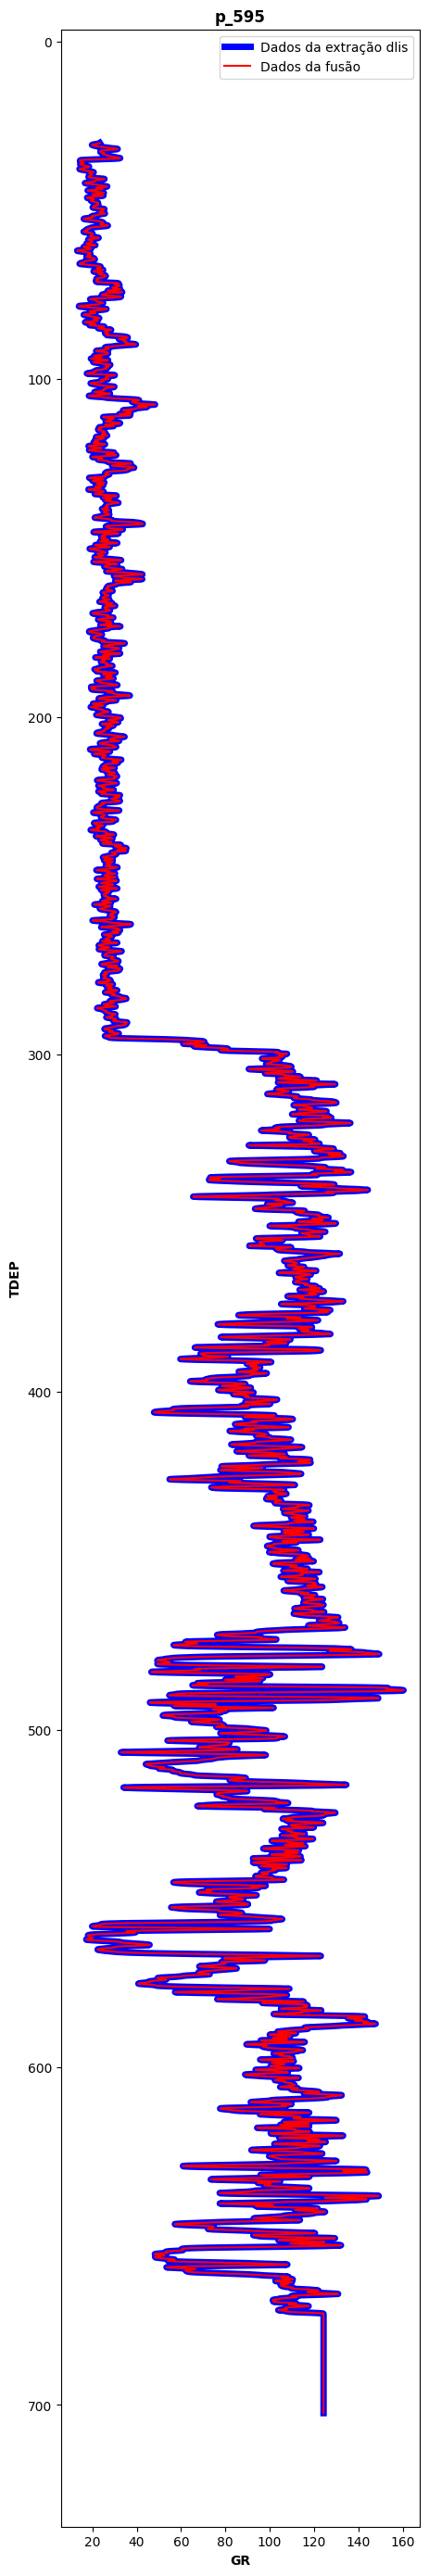

In [7]:
cria_plot_gr_dlis_fusao(dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-BRSA-595-SE.csv'], dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-595-SE.csv'], 'p_595')